In [1]:
# import required libraries
import pandas as pd
import numpy as np

import sklearn as scikit
import matplotlib.pyplot as pyplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# read csv "data/inputs/Carbon Emissions by Country/Carbon_(CO2)_Emissions_by_Country.csv"

df = pd.read_csv("data/inputs/Carbon Emissions by Country/Carbon_(CO2)_Emissions_by_Country.csv")

print(df)

          Country  Region        Date  Kilotons of Co2  Metric Tons Per Capita
0     Afghanistan    Asia  01-01-2011           8930.0                    0.31
1     Afghanistan    Asia  01-01-2012           8080.0                    0.27
2     Afghanistan    Asia  01-01-2010           7110.0                    0.25
3     Afghanistan    Asia  01-01-2019           6080.0                    0.16
4     Afghanistan    Asia  01-01-2018           6070.0                    0.17
...           ...     ...         ...              ...                     ...
5672     Zimbabwe  Africa  01-01-2004           9770.0                    0.80
5673     Zimbabwe  Africa  01-01-2007           9760.0                    0.78
5674     Zimbabwe  Africa  01-01-2010           9600.0                    0.75
5675     Zimbabwe  Africa  01-01-2009           7750.0                    0.61
5676     Zimbabwe  Africa  01-01-2008           7600.0                    0.61

[5677 rows x 5 columns]


In [3]:
# read in csv 

df2 = pd.read_csv("data/inputs/US Carbon Emissions by State/CO2_Emissions_US.csv")

print(df2)

       year state-name                                      sector-name  \
0      1970    Alabama              Industrial carbon dioxide emissions   
1      1970    Alabama              Industrial carbon dioxide emissions   
2      1970    Alabama              Industrial carbon dioxide emissions   
3      1970    Alabama              Industrial carbon dioxide emissions   
4      1970    Alabama  Total carbon dioxide emissions from all sectors   
...     ...        ...                                              ...   
59896  2021    Wyoming              Commercial carbon dioxide emissions   
59897  2021    Wyoming             Residential carbon dioxide emissions   
59898  2021    Wyoming             Residential carbon dioxide emissions   
59899  2021    Wyoming             Residential carbon dioxide emissions   
59900  2021    Wyoming  Total carbon dioxide emissions from all sectors   

         fuel-name       value  
0             Coal   26.721507  
1        Petroleum    3.577779  


In [4]:
# Data preparation for joining.

df = df[df["Country"] == 'United States']
df['Year'] = df.apply(lambda x: pd.Series(pd.to_datetime(x[2]).year), axis = 1)
ce_global_filter = df.filter(items=['Country', 'Year', 'Kilotons of Co2', 'Metric Tons Per Capita'])
print(ce_global_filter)

C:\Users\grego\AppData\Local\Temp\ipykernel_16608\80242589.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Year'] = df.apply(lambda x: pd.Series(pd.to_datetime(x[2]).year), axis = 1)


            Country  Year  Kilotons of Co2  Metric Tons Per Capita
5407  United States  2000       5775810.00                   20.47
5408  United States  2005       5753490.23                   19.47
5409  United States  2001       5748260.00                   20.17
5410  United States  2004       5738290.04                   19.60
5411  United States  2007       5736319.82                   19.04
5412  United States  2003       5658990.23                   19.51
5413  United States  2006       5653080.08                   18.95
5414  United States  1999       5609020.00                   20.10
5415  United States  2002       5593029.79                   19.45
5416  United States  1998       5590540.00                   20.27
5417  United States  2008       5558379.88                   18.28
5418  United States  1997       5543350.00                   20.33
5419  United States  2010       5392109.86                   17.43
5420  United States  1996       5273490.00                   1

In [5]:
# join data sets

combined_df = ce_global_filter.merge(df2, left_on='Year', right_on='year')

print(combined_df)


             Country  Year  Kilotons of Co2  Metric Tons Per Capita  year  \
0      United States  2000        5775810.0                   20.47  2000   
1      United States  2000        5775810.0                   20.47  2000   
2      United States  2000        5775810.0                   20.47  2000   
3      United States  2000        5775810.0                   20.47  2000   
4      United States  2000        5775810.0                   20.47  2000   
...              ...   ...              ...                     ...   ...   
34213  United States  1991        4807500.0                   19.00  1991   
34214  United States  1991        4807500.0                   19.00  1991   
34215  United States  1991        4807500.0                   19.00  1991   
34216  United States  1991        4807500.0                   19.00  1991   
34217  United States  1991        4807500.0                   19.00  1991   

      state-name                                      sector-name  \
0     

In [6]:
#rename column

combined_df = combined_df.rename(columns={ 'value': 'Million Metric Tons' })

print(combined_df.shape)

# lists containing values for dependent and independent variables

dep_var_1 = combined_df['Kilotons of Co2'][:20000]
ind_var_1 = combined_df['Metric Tons Per Capita'][:20000]
ind_var_2 = combined_df['Million Metric Tons'][:20000]


print(dep_var_1)
print(ind_var_1)
print(ind_var_2)

(34218, 9)
0        5775810.00
1        5775810.00
2        5775810.00
3        5775810.00
4        5775810.00
            ...    
19995    5107209.96
19996    5107209.96
19997    5107209.96
19998    5107209.96
19999    5107209.96
Name: Kilotons of Co2, Length: 20000, dtype: float64
0        20.47
1        20.47
2        20.47
3        20.47
4        20.47
         ...  
19995    16.04
19996    16.04
19997    16.04
19998    16.04
19999    16.04
Name: Metric Tons Per Capita, Length: 20000, dtype: float64
0          0.014109
1         18.997993
2         85.908083
3        142.298577
4         25.287666
            ...    
19995      1.221395
19996      0.494176
19997      1.715571
19998      8.563764
19999      0.071527
Name: Million Metric Tons, Length: 20000, dtype: float64


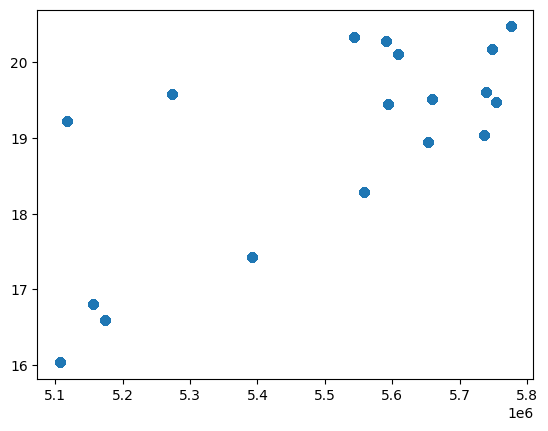

In [7]:
# visualize relationship between Kilotons of CO2 and Metric Tons Per Capita

pygraph_1 = pyplot.scatter(dep_var_1, ind_var_1)

pygraph_1

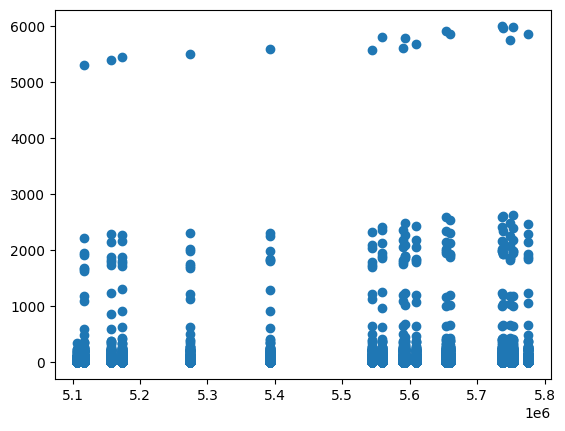

In [8]:
# visualize relationship between Kilotons of CO2 and Million Metric Tons

pygraph_2 = pyplot.scatter(dep_var_1, ind_var_2)

pygraph_2

x_train, x_test, y_train, y_test = train_test_split(dep_var_1, indep_var_1, test_size=0.3, random_state= 5)

print(x_train)
print(y_train)

In [9]:
# train, test, split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(dep_var_1, ind_var_1, test_size=0.3, random_state= 5)

print(x_train_1) 
print(y_train_1)

5771     5736319.82
9169     5609020.00
16463    5173600.10
16698    5173600.10
4397     5738290.04
            ...    
1032     5775810.00
5520     5736319.82
3046     5748260.00
18638    5117040.00
2915     5748260.00
Name: Kilotons of Co2, Length: 14000, dtype: float64
5771     19.04
9169     20.10
16463    16.60
16698    16.60
4397     19.60
         ...  
1032     20.47
5520     19.04
3046     20.17
18638    19.22
2915     20.17
Name: Metric Tons Per Capita, Length: 14000, dtype: float64


In [10]:
# compute linear regression

linear_regression = LinearRegression()

x = np.array(x_train_1, dtype=np.float64)
y = np.array(y_train_1, dtype=np.float64)

lr = linear_regression.fit(x.reshape(-1, 1), y)

print(lr)

# compute regression line

regression = lr.predict(x.reshape(-1,1))

print(regression)

LinearRegression()
[19.8418973  19.38538401 17.82391305 ... 19.8847163  17.62108136
 19.8847163 ]


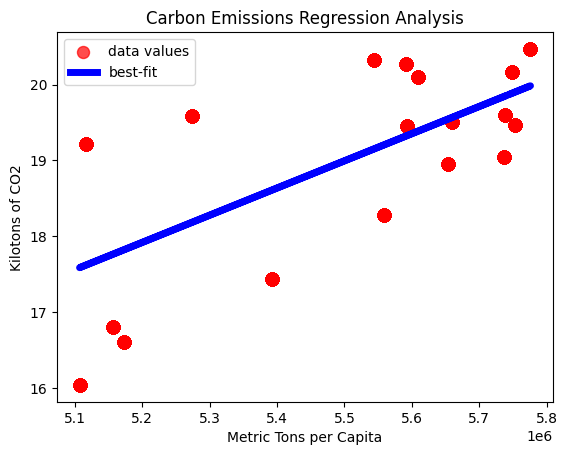

In [11]:
# visualize regression line

pyplot.scatter(dep_var_1, ind_var_1, label='data values', alpha=0.7, color='red', s=75)
pyplot.plot(x, regression, label='best-fit', color='blue', linewidth=5)
pyplot.title('Carbon Emissions Regression Analysis')
pyplot.xlabel('Metric Tons per Capita')
pyplot.ylabel('Kilotons of CO2')
pyplot.legend()
pyplot.show()


In [12]:
# train, test, split

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(dep_var_1, ind_var_2, test_size=0.3, random_state= 5)

print(x_train_2) 
print(y_train_2)

5771     5736319.82
9169     5609020.00
16463    5173600.10
16698    5173600.10
4397     5738290.04
            ...    
1032     5775810.00
5520     5736319.82
3046     5748260.00
18638    5117040.00
2915     5748260.00
Name: Kilotons of Co2, Length: 14000, dtype: float64
5771     87.758515
9169      8.814669
16463    20.625533
16698    17.909847
4397     32.235828
           ...    
1032      0.363207
5520     12.398231
3046      0.029733
18638    15.996389
2915      0.293011
Name: Million Metric Tons, Length: 14000, dtype: float64


In [13]:
# compute linear regression

linear_regression_2 = LinearRegression()

x2 = np.array(x_train_2, dtype=np.float64)
y2 = np.array(y_train_2, dtype=np.float64)

lr2 = linear_regression.fit(x2.reshape(-1, 1), y2)

print(lr2)

# compute regression line

regression2 = lr.predict(x.reshape(-1,1))

print(regression2)

LinearRegression()
[41.2011516  40.10776373 36.36790899 ... 41.30370671 35.88210997
 41.30370671]


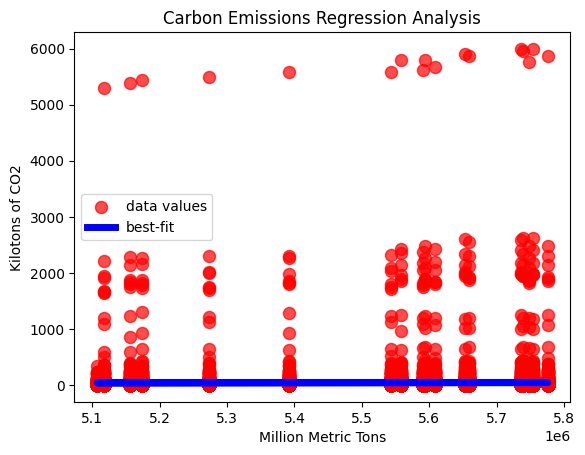

In [14]:
# visualize regression line

pyplot.scatter(dep_var_1, ind_var_2, label='data values', alpha=0.7, color='red', s=75)
pyplot.plot(x2, regression2, label='best-fit', color='blue', linewidth=5)
pyplot.title('Carbon Emissions Regression Analysis')
pyplot.xlabel('Million Metric Tons')
pyplot.ylabel('Kilotons of CO2')
pyplot.legend()
pyplot.show()